a) Showcase  gbm classifier techniques

XGBoost, Catboost, LightGBM, randomforest, adaboost, decision tree classifier in the colab 

For showcasing the different classifiers, I am using the employee attrition dataset available on Kaggle at https://www.kaggle.com/itssuru/hr-employee-attrition

In [1]:
!pip install xgboost
!pip install catboost

     |████████████████████████████████| 76.3 MB 1.2 MB/s 


In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [63]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

import lightgbm as lgb

In [4]:
df = pd.read_csv('https://github.com/babu-rajendran/gradient-boost-methods/raw/main/data/HR-Employee-Attrition.csv')
print(df.shape)
df.head(5)

(1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [5]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

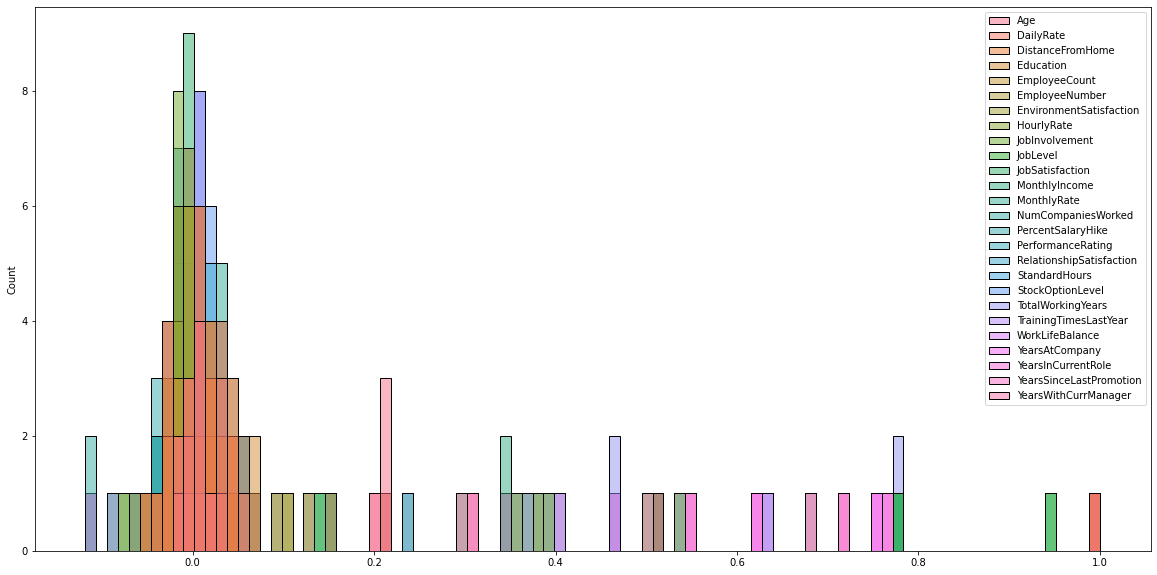

In [9]:
plt.figure(figsize=(20,10))
sns.histplot(df.corr())
plt.show()

In [10]:
df.Over18.replace(['Y','N'],[1,0],inplace=True)
df.Gender.replace(['Male','Female'],[1,0],inplace=True)
df.Attrition.replace(['Yes','No'],[1,0],inplace=True)
df.OverTime.replace(['Yes','No'],[1,0],inplace=True)
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,0,94,3,2,Sales Executive,4,Single,5993,19479,8,1,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,1,61,2,2,Research Scientist,2,Married,5130,24907,1,1,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,1,92,2,1,Laboratory Technician,3,Single,2090,2396,6,1,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,0,56,3,1,Research Scientist,3,Married,2909,23159,1,1,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,1,40,3,1,Laboratory Technician,2,Married,3468,16632,9,1,0,12,3,4,80,1,6,3,3,2,2,2,2
5,32,0,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,1,79,3,1,Laboratory Technician,4,Single,3068,11864,0,1,0,13,3,3,80,0,8,2,2,7,7,3,6
6,59,0,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,0,81,4,1,Laboratory Technician,1,Married,2670,9964,4,1,1,20,4,1,80,3,12,3,2,1,0,0,0
7,30,0,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,4,1,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,1,0,22,4,2,80,1,1,2,3,1,0,0,0
8,38,0,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,4,1,44,2,3,Manufacturing Director,3,Single,9526,8787,0,1,0,21,4,2,80,0,10,2,3,9,7,1,8
9,36,0,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,3,1,94,3,2,Healthcare Representative,3,Married,5237,16577,6,1,0,13,3,2,80,2,17,3,2,7,7,7,7


In [11]:
#Categorical Variable conversion
df = pd.get_dummies(df,drop_first=True)
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,1,1,2,0,94,3,2,4,5993,19479,8,1,1,11,3,1,80,0,8,0,1,6,4,0,5,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,49,0,279,8,1,1,2,3,1,61,2,2,2,5130,24907,1,1,0,23,4,4,80,1,10,3,3,10,7,1,7,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,37,1,1373,2,2,1,4,4,1,92,2,1,3,2090,2396,6,1,1,15,3,2,80,0,7,3,3,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,1,5,4,0,56,3,1,3,2909,23159,1,1,1,11,3,3,80,0,8,3,3,8,7,3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,27,0,591,2,1,1,7,1,1,40,3,1,2,3468,16632,9,1,0,12,3,4,80,1,6,3,3,2,2,2,2,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0


In [12]:
df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,0.600000,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,1.0,0.282993,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129,0.188435,0.709524,0.653741,0.303401,0.412245,0.108163,0.315646,0.055782,0.089796,0.035374,0.176190,0.069388,0.098639,0.054422,0.198639,0.221769,0.056463,0.457823,0.319728
std,9.135373,0.367863,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,0.490065,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,0.0,0.450606,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136,0.391193,0.454137,0.475939,0.459884,0.492406,0.310692,0.464931,0.229579,0.285986,0.184786,0.381112,0.254199,0.298279,0.226925,0.399112,0.415578,0.230891,0.498387,0.466530
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,0.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,1.0,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,0.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,1.0,0.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,1.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,1.0,0.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,1.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,1.0,1.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.00

In [13]:
X = df.drop(['Attrition'],axis=1)
Y = df.Attrition

x_train, x_test, y_train, y_test = train_test_split(X ,Y ,test_size=0.3, random_state=1)

**XGBoost**

In [51]:
model = XGBClassifier(max_depth=50, min_child_weight=1,  n_estimators=200,\
                          n_jobs=-1 , verbose=1,learning_rate=0.16)

In [52]:
model.fit(x_train,y_train)

XGBClassifier(learning_rate=0.16, max_depth=50, n_estimators=200, n_jobs=-1,
              verbose=1)

In [53]:
print(roc_auc_score(y_train,model.predict_proba(x_train)[:,1]),
                            roc_auc_score(y_test,model.predict_proba(x_test)[:,1]))

1.0 0.7970065648637077


**CatBoost Classifier**

In [67]:
cb = CatBoostClassifier(
    iterations=10, 
    learning_rate=0.5, 
)

In [68]:
cat_features = list(range(0, X.shape[1]))
print(cat_features)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]


In [69]:
cb.fit(x_train, y_train, 
        cat_features= cat_features, 
        eval_set=(x_test, y_test), 
        verbose=False
)

print('CatBoost model is fitted: ' + str(cb.is_fitted()))
print('CatBoost model parameters:')
print(cb.get_params())

CatBoost model is fitted: True
CatBoost model parameters:
{'iterations': 10, 'learning_rate': 0.5}


In [70]:
cb = CatBoostClassifier(
    iterations=20,
#     verbose=5,
)

cb.fit(
    x_train, y_train,
    cat_features=cat_features,
    eval_set=(x_test, y_test),
)

Learning rate set to 0.174996
0:	learn: 0.5985245	test: 0.6040608	best: 0.6040608 (0)	total: 6.8ms	remaining: 129ms
1:	learn: 0.5158257	test: 0.5289851	best: 0.5289851 (1)	total: 12.8ms	remaining: 116ms
2:	learn: 0.4673423	test: 0.4915491	best: 0.4915491 (2)	total: 19ms	remaining: 108ms
3:	learn: 0.4368150	test: 0.4672930	best: 0.4672930 (3)	total: 24.6ms	remaining: 98.3ms
4:	learn: 0.4162614	test: 0.4515796	best: 0.4515796 (4)	total: 30.1ms	remaining: 90.3ms
5:	learn: 0.4071844	test: 0.4448181	best: 0.4448181 (5)	total: 32.2ms	remaining: 75.1ms
6:	learn: 0.3848316	test: 0.4273862	best: 0.4273862 (6)	total: 38ms	remaining: 70.7ms
7:	learn: 0.3625787	test: 0.4116046	best: 0.4116046 (7)	total: 43.6ms	remaining: 65.5ms
8:	learn: 0.3533544	test: 0.4070045	best: 0.4070045 (8)	total: 49ms	remaining: 59.8ms
9:	learn: 0.3365687	test: 0.4001993	best: 0.4001993 (9)	total: 54.3ms	remaining: 54.3ms
10:	learn: 0.3242697	test: 0.3920864	best: 0.3920864 (10)	total: 59.6ms	remaining: 48.8ms
11:	learn:

In [71]:
print(cb.predict_proba(x_test))

[[0.89721156 0.10278844]
 [0.39299605 0.60700395]
 [0.5876431  0.4123569 ]
 [0.74020009 0.25979991]
 [0.89512175 0.10487825]
 [0.93372463 0.06627537]
 [0.89926774 0.10073226]
 [0.74978961 0.25021039]
 [0.88565249 0.11434751]
 [0.87673825 0.12326175]
 [0.94981273 0.05018727]
 [0.88480814 0.11519186]
 [0.66100802 0.33899198]
 [0.84409851 0.15590149]
 [0.80487987 0.19512013]
 [0.86871561 0.13128439]
 [0.88906859 0.11093141]
 [0.51191829 0.48808171]
 [0.92318473 0.07681527]
 [0.91726046 0.08273954]
 [0.92293461 0.07706539]
 [0.73984944 0.26015056]
 [0.92390967 0.07609033]
 [0.88407911 0.11592089]
 [0.78691094 0.21308906]
 [0.90425766 0.09574234]
 [0.8122315  0.1877685 ]
 [0.81169707 0.18830293]
 [0.86154035 0.13845965]
 [0.75669554 0.24330446]
 [0.92116766 0.07883234]
 [0.9309654  0.0690346 ]
 [0.94643765 0.05356235]
 [0.80873115 0.19126885]
 [0.8610212  0.1389788 ]
 [0.66029996 0.33970004]
 [0.91558469 0.08441531]
 [0.9452091  0.0547909 ]
 [0.8528418  0.1471582 ]
 [0.62271454 0.37728546]


In [72]:
print(cb.predict(x_test))

[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [73]:
confusion_matrix(y_test, predictions)

array([[345,  19],
       [ 40,  37]])

In [74]:
print(roc_auc_score(y_train, cb.predict_proba(x_train)[:,1]),
                            roc_auc_score(y_test, cb.predict_proba(x_test)[:,1]))

0.8911752013808976 0.7994505494505494


**LightGBM**

In [75]:
lgbm = LGBMClassifier(silent=False)
param_dist = {"max_depth": [25,50, 75],
              "learning_rate" : [0.01,0.05,0.1],
              "num_leaves": [300,900,1200],
              "n_estimators": [200]
             }

d_train = lgb.Dataset(x_train, label= y_train)
params = {"max_depth": 50, "learning_rate" : 0.1, "num_leaves": 900,  "n_estimators": 300}

In [76]:
lgb_class = lgb.train(params, d_train)
print(roc_auc_score(y_train, lgb_class.predict(x_train)),
                            roc_auc_score(y_test, lgb_class.predict(x_test)))

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


1.0 0.8072284857999144


**RandomForest**

In [77]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=100)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

In [78]:
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.8412698412698413


In [79]:
confusion_matrix(y_test, y_pred)

array([[362,   2],
       [ 68,   9]])

In [80]:
print(roc_auc_score(y_train, clf.predict_proba(x_train)[:,1]),
                            roc_auc_score(y_test, clf.predict_proba(x_test)[:,1]))

1.0 0.8026794633937491


**AdaBoost**

In [81]:
classifier = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200
)
classifier.fit(x_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=200)

In [82]:
predictions = classifier.predict(x_test)

In [83]:
confusion_matrix(y_test, predictions)

array([[345,  19],
       [ 40,  37]])

In [84]:
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.8412698412698413


In [86]:
print(roc_auc_score(y_train, classifier.predict_proba(x_train)[:,1]),
                            roc_auc_score(y_test, classifier.predict_proba(x_test)[:,1]))

0.9825517836593786 0.8370914799486228


**Decision Tree**

In [87]:
classifier = DecisionTreeClassifier()
classifier = classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)

In [88]:
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.7891156462585034


In [89]:
confusion_matrix(y_test, predictions)

array([[345,  19],
       [ 40,  37]])

In [90]:
print(roc_auc_score(y_train, classifier.predict_proba(x_train)[:,1]),
                            roc_auc_score(y_test, classifier.predict_proba(x_test)[:,1]))

1.0 0.6264985014985015
